# ENCODER

These are the steps we will be following:
- Color space conversion
- Downsampling
- Splitting into patches
- DCT
- Quantization
- Zigzag ordering
- Entropy coding
- File structure

## 1. Color Space Conversion

We want image to be in YCbCr color space for the JPEG, so we need to convert the RGB color space into YCRCb.

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
image_path = 'penguin.png'  
image = Image.open(image_path)
image_rgb = np.array(image)

In [23]:
def rgb_to_ycbcr(image_rgb):
    """
    Converts an RGB image to YCbCr color space using the ITU-R BT.601 standard.
    """
    # Transformation matrix
    transform_matrix = np.array([[0.299, 0.587, 0.114],        # converts RGB to Y channel
                                 [-0.1687, -0.3313, 0.5],      # converts RGB to Cb channel
                                 [0.5, -0.4187, -0.0813]])     # converts RGB to Cr channel
    offset = np.array([0, 128, 128])

    ycbcr_image = image_rgb @ transform_matrix.T + offset
    ycbcr_image = ycbcr_image.clip(0, 255).astype(np.uint8)
    return ycbcr_image

In [25]:
# this is from class
#def rgb_to_ycbcr(image_rgb):
    
#    transform_matrix = np.array([[65.481, 128.553, 24.966],       # convert to Y using RGB
#                                 [-37.79, -74.203, 112],          # convert to Cb using RGB
#                                 [112, -93.786, -18.214]])        # convert to Cr using RGB
#    offset = np.array([16, 128, 128])

    # Apply the transformation
#    ycbcr_image = image_rgb @ transform_matrix.T + offset
#    ycbcr_image = ycbcr_image.clip(0, 255).astype(np.uint8)
#    return ycbcr_image

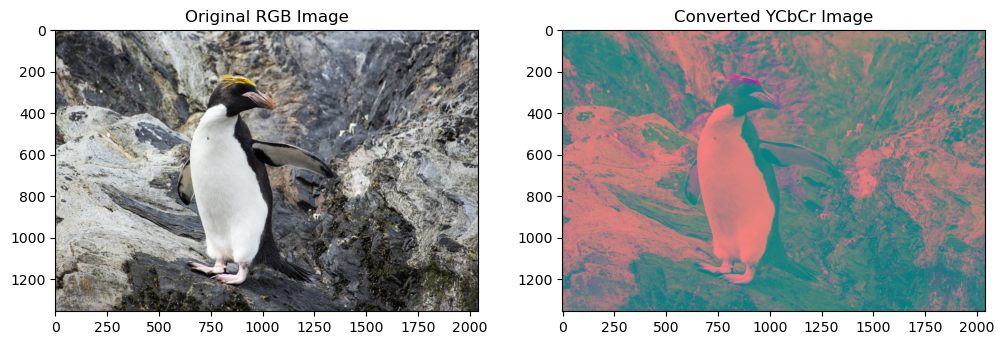

In [20]:
image_ycbcr = rgb_to_ycbcr(image_rgb)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original RGB Image")
plt.imshow(image_rgb)

plt.subplot(1, 2, 2)
plt.title("Converted YCbCr Image")
plt.imshow(image_ycbcr)
plt.show()

## 2. Downsampling

In [28]:
def downsample_ycbcr(image_ycbcr):
    """
    Downsamples the Cb and Cr channels by a factor of 2 (4:2:0 subsampling).
    """
    Y = image_ycbcr[:, :, 0]
    Cb = image_ycbcr[:, :, 1]
    Cr = image_ycbcr[:, :, 2]

    # CAN BE IMPROVED BY TAKING MAX INSTEAD OF STRIDES
    # Downsample Cb and Cr channels by taking every second pixel
    Cb_downsampled = Cb[::2, ::2]
    Cr_downsampled = Cr[::2, ::2]

    return Y, Cb_downsampled, Cr_downsampled

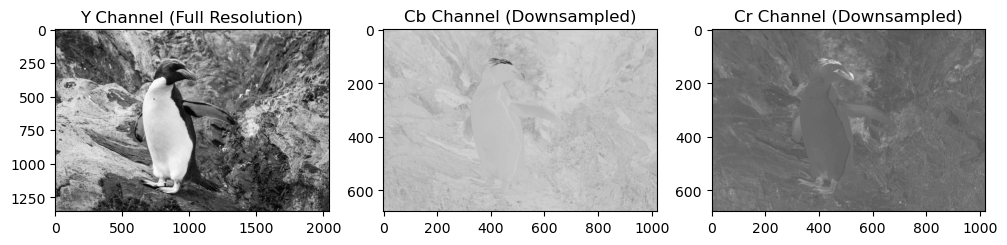

In [22]:
Y, Cb_downsampled, Cr_downsampled = downsample_ycbcr(image_ycbcr)

# Displayin downsampled channels
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Y Channel (Full Resolution)")
plt.imshow(Y, cmap="gray")

plt.subplot(1, 3, 2)
plt.title("Cb Channel (Downsampled)")
plt.imshow(Cb_downsampled, cmap="gray")

plt.subplot(1, 3, 3)
plt.title("Cr Channel (Downsampled)")
plt.imshow(Cr_downsampled, cmap="gray")
plt.show()

## 3. Splitting into patches

In this step we will split the YCbCr into patches of 8x8 blocks.

In [31]:
def split_into_blocks(channel, block_size=8):
    """
    Splits a single channel into non-overlapping blocks of the given size.
    """
    h, w = channel.shape
    blocks = []
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = channel[i:i+block_size, j:j+block_size]
            
            if block.shape == (block_size, block_size):
                blocks.append(block)

    # Storing each block from list into an array for easier processing
    return np.array(blocks)

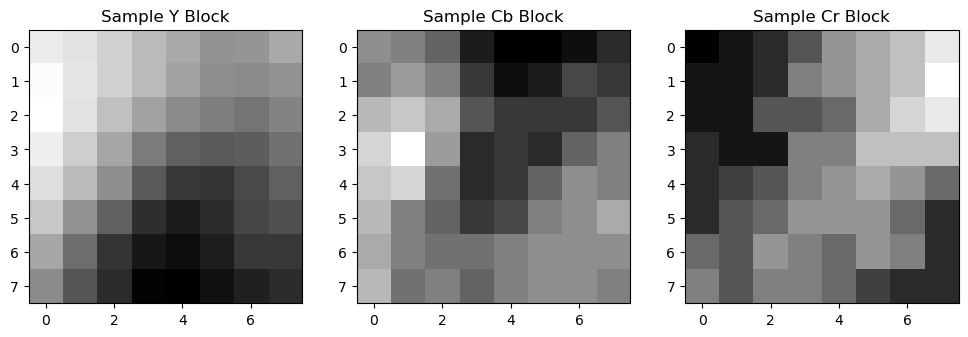

In [32]:
# Split Y, Cb, and Cr channels into 8x8 blocks
Y_blocks = split_into_blocks(Y)
Cb_blocks = split_into_blocks(Cb_downsampled)
Cr_blocks = split_into_blocks(Cr_downsampled)

# Display a sample 8x8 block out of the whole channel for each channel
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Sample Y Block")
plt.imshow(Y_blocks[0], cmap="gray")

plt.subplot(1, 3, 2)
plt.title("Sample Cb Block")
plt.imshow(Cb_blocks[0], cmap="gray")

plt.subplot(1, 3, 3)
plt.title("Sample Cr Block")
plt.imshow(Cr_blocks[0], cmap="gray")
plt.show()

## 4. DCT

## 5. Quantization

## 6. Zigzag Ordering

## 7. Entropy Coding

**Can try huffman encoding also**

## 8. File Structure

# DECODER